In [ ]:
# !pip install pydub
# !pip install scipy
# !pip install tensorflow==2.10.0
# !pip install tensorflow-io==0.27.0
# ! pip install librosa

https://apmonitor.com/dde/index.php/Main/AudioAnalysis

https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook


In [18]:
import librosa
import random

import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import soundfile as sf



from os import listdir
from os.path import isfile, join, basename
from scipy.io import wavfile


from scipy import signal
from pydub import AudioSegment
from IPython.display import Audio

In [26]:
audio_path = '../data/wav_corpus_uk/'
audio_files = [join(audio_path, f) for f in listdir(
    audio_path) if isfile(join(audio_path, f))]
print(audio_files)

['../data/wav_corpus_uk/f_ans117auk.wav', '../data/wav_corpus_uk/f_ans118auk.wav', '../data/wav_corpus_uk/f_dis014buk.wav', '../data/wav_corpus_uk/f_dis016auk.wav', '../data/wav_corpus_uk/f_dis106auk.wav', '../data/wav_corpus_uk/f_dis107auk.wav', '../data/wav_corpus_uk/f_dis108auk.wav', '../data/wav_corpus_uk/f_dis150auk.wav', '../data/wav_corpus_uk/f_dis201auk.wav', '../data/wav_corpus_uk/f_dis202auk.wav', '../data/wav_corpus_uk/f_dis204auk.wav', '../data/wav_corpus_uk/f_dis219auk.wav', '../data/wav_corpus_uk/f_gio016auk.wav', '../data/wav_corpus_uk/f_gio017auk.wav', '../data/wav_corpus_uk/f_gio108auk.wav', '../data/wav_corpus_uk/f_gio206auk.wav', '../data/wav_corpus_uk/f_gio207auk.wav', '../data/wav_corpus_uk/f_gio208auk.wav', '../data/wav_corpus_uk/f_gio209auk.wav', '../data/wav_corpus_uk/f_gio212auk.wav', '../data/wav_corpus_uk/f_tri059auk.wav', '../data/wav_corpus_uk/m_dis008buk.wav', '../data/wav_corpus_uk/m_dis013auk.wav', '../data/wav_corpus_uk/m_rab084auk.wav', '../data/wav_co

In [20]:
f = audio_files[0]
f

'../data/wav_corpus/f_ans001aen.wav'

In [22]:
y, sr = librosa.load(audio_files[0])
print(np.shape(y), sr)

(48510,) 22050


In [12]:
# s = sampling (int)
# a = audio signal (numpy array)
s, a = wavfile.read(f)
print('Sampling Rate:', s)
print('Audio Shape:', np.shape(a))

Sampling Rate: 44100
Audio Shape: (97020,)


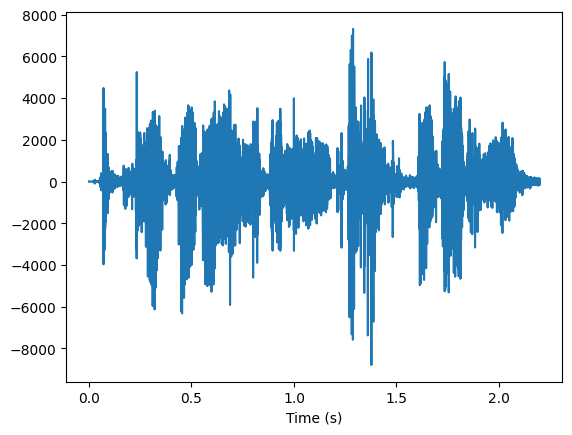

In [29]:
def plot_waveform(data):
    # number of samples
    na = data.shape[0]
    # audio time duration
    la = na / s

    # plot signal versus time
    t = np.linspace(0, la, na)
    plt.plot(t, data)
    plt.xlabel('Time (s)')
    plt.show()


plot_waveform(a)

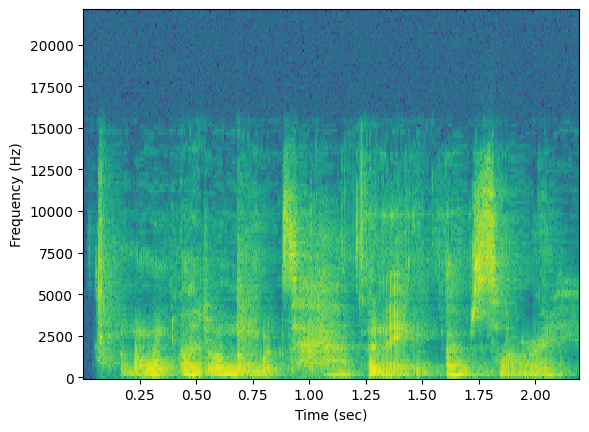

In [15]:
fr, tm, spgram = signal.spectrogram(a, s)
lspg = np.log(spgram)
plt.pcolormesh(tm, fr, lspg, shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [33]:
def plot_spec(data: np.array, sr: int, title: str, fpath: str) -> None:
    '''
    Function for plotting spectrogram along with amplitude wave graph
    '''
    label = str(fpath).split('/')[-1].split('_')[0]
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].title.set_text(f'{title} / Label: {label}')
    ax[0].specgram(data, Fs=2)
    ax[1].set_ylabel('Amplitude')
    ax[1].plot(np.linspace(0, 1, len(data)), data)

In [33]:
def add_noise(wav):
    wav_n = wav + 0.009*np.random.normal(0, 1, len(wav))
    return wav_n


def invert_polarity(wav):
    return wav * -1


def create_filename(path, id, *tags):
    filename_n = basename(path)
    filename_n = filename_n[:-4]
    filename_n += '_'
    for t in tags:
        filename_n += t
    filename_n = filename_n + '_' + str(id) + '.wav'

    return filename_n


def write_audio_file(folder, filename, audio_wav, sr):
    file_path = join(folder, filename)
    sf.write(file_path, audio_wav, sr, 'PCM_24')
    return file_path

In [32]:
augment_tag = 'a'
noise_tag = 'n'
polar_inversion_tag = 'p'
noise_seed = 100
polar_inversion_seed = 200

audio_files_aug = []
aug_path = '../data/wav_corpus_uk/aug/'
base_seed = noise_seed + 1
for path in audio_files:
    s, audio = wavfile.read(path)
    audio_new = add_noise(audio)
    filename = create_filename(path, base_seed, augment_tag, noise_tag)
    new_path = write_audio_file(aug_path, filename, audio_new, s)
    audio_files_aug.append(new_path)
    base_seed += 1

print(audio_files_aug)

['../data/wav_corpus_uk/aug/f_ans117auk_an_101.wav', '../data/wav_corpus_uk/aug/f_ans118auk_an_102.wav', '../data/wav_corpus_uk/aug/f_dis014buk_an_103.wav', '../data/wav_corpus_uk/aug/f_dis016auk_an_104.wav', '../data/wav_corpus_uk/aug/f_dis106auk_an_105.wav', '../data/wav_corpus_uk/aug/f_dis107auk_an_106.wav', '../data/wav_corpus_uk/aug/f_dis108auk_an_107.wav', '../data/wav_corpus_uk/aug/f_dis150auk_an_108.wav', '../data/wav_corpus_uk/aug/f_dis201auk_an_109.wav', '../data/wav_corpus_uk/aug/f_dis202auk_an_110.wav', '../data/wav_corpus_uk/aug/f_dis204auk_an_111.wav', '../data/wav_corpus_uk/aug/f_dis219auk_an_112.wav', '../data/wav_corpus_uk/aug/f_gio016auk_an_113.wav', '../data/wav_corpus_uk/aug/f_gio017auk_an_114.wav', '../data/wav_corpus_uk/aug/f_gio108auk_an_115.wav', '../data/wav_corpus_uk/aug/f_gio206auk_an_116.wav', '../data/wav_corpus_uk/aug/f_gio207auk_an_117.wav', '../data/wav_corpus_uk/aug/f_gio208auk_an_118.wav', '../data/wav_corpus_uk/aug/f_gio209auk_an_119.wav', '../data/wa

In [34]:
base_seed = polar_inversion_seed + 1
for path in audio_files:
    s, audio = wavfile.read(path)
    audio_new = invert_polarity(audio)
    filename = create_filename(
        path, base_seed, augment_tag, polar_inversion_tag)
    new_path = write_audio_file(aug_path, filename, audio_new, s)
    audio_files_aug.append(new_path)
    base_seed += 1

print(audio_files_aug)

['../data/wav_corpus_uk/aug/f_ans117auk_an_101.wav', '../data/wav_corpus_uk/aug/f_ans118auk_an_102.wav', '../data/wav_corpus_uk/aug/f_dis014buk_an_103.wav', '../data/wav_corpus_uk/aug/f_dis016auk_an_104.wav', '../data/wav_corpus_uk/aug/f_dis106auk_an_105.wav', '../data/wav_corpus_uk/aug/f_dis107auk_an_106.wav', '../data/wav_corpus_uk/aug/f_dis108auk_an_107.wav', '../data/wav_corpus_uk/aug/f_dis150auk_an_108.wav', '../data/wav_corpus_uk/aug/f_dis201auk_an_109.wav', '../data/wav_corpus_uk/aug/f_dis202auk_an_110.wav', '../data/wav_corpus_uk/aug/f_dis204auk_an_111.wav', '../data/wav_corpus_uk/aug/f_dis219auk_an_112.wav', '../data/wav_corpus_uk/aug/f_gio016auk_an_113.wav', '../data/wav_corpus_uk/aug/f_gio017auk_an_114.wav', '../data/wav_corpus_uk/aug/f_gio108auk_an_115.wav', '../data/wav_corpus_uk/aug/f_gio206auk_an_116.wav', '../data/wav_corpus_uk/aug/f_gio207auk_an_117.wav', '../data/wav_corpus_uk/aug/f_gio208auk_an_118.wav', '../data/wav_corpus_uk/aug/f_gio209auk_an_119.wav', '../data/wa

: 

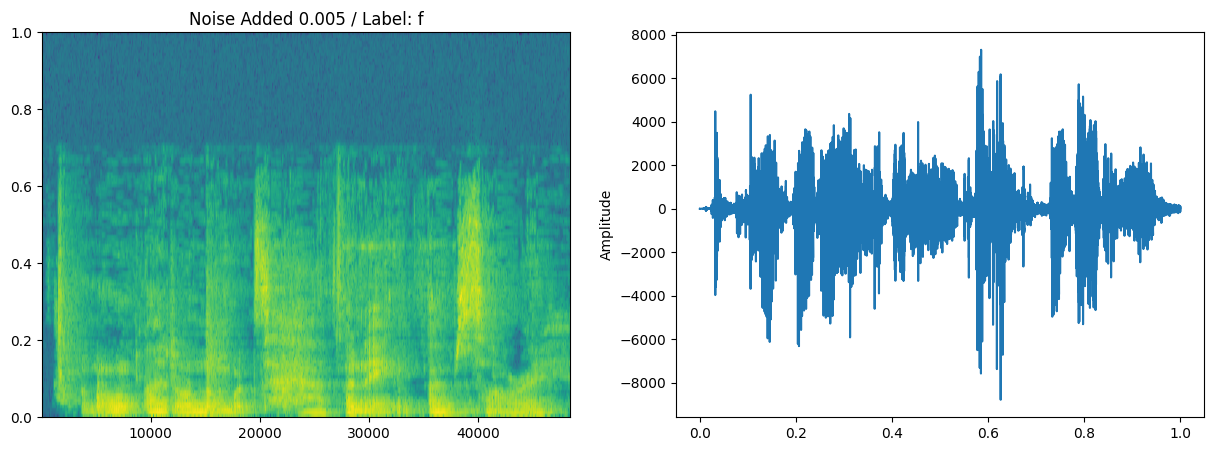

In [45]:


wav_n = a + 0.009*np.random.normal(0, 1, len(a))
plot_spec(wav_n, s, 'Noise Added 0.005', f)
sf.write('stereo_file1.wav', wav_n, s, 'PCM_24')

- Time stretching (unsafe)
- Time shifting (unsafe)
- Pitch scaling (unsafe)
- Noise injection (safe)
- Polarity inversion (safe)


In [39]:
Audio(data=a, rate=s)

In [44]:
Audio(data=wav_n, rate=s)